The following is an analysis of League of Legends professional match data from 2015 to 2018.

The aim of this analysis is to demonstrate proficiency with basic Python. 

Step 1: Import the Python libraries

Pandas and numpy are imported as standard Data Science libraries, as well as seaborn and matplotlib for visualisation

In [222]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Step 2: Import the data

Note that the .csv file can be found here: https://www.dropbox.com/sh/e19xutwsnry3agn/AACEcTs6N7pBz56ndiQXrkIla?dl=0

In [223]:
LoL = pd.read_csv("C:/Users/Greg/Documents/Coding/LeagueofLegends.csv")

Step 3: Examine the input data.

In [224]:
LoL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7620 entries, 0 to 7619
Data columns (total 57 columns):
League              7620 non-null object
Year                7620 non-null int64
Season              7620 non-null object
Type                7620 non-null object
blueTeamTag         7582 non-null object
bResult             7620 non-null int64
rResult             7620 non-null int64
redTeamTag          7583 non-null object
gamelength          7620 non-null int64
golddiff            7620 non-null object
goldblue            7620 non-null object
bKills              7620 non-null object
bTowers             7620 non-null object
bInhibs             7620 non-null object
bDragons            7620 non-null object
bBarons             7620 non-null object
bHeralds            7620 non-null object
goldred             7620 non-null object
rKills              7620 non-null object
rTowers             7620 non-null object
rInhibs             7620 non-null object
rDragons            7620 non-null ob

Step 4: Identify target information 

Using this information, I will:

- Identify the most picked champions for each position
- Evaluate how varied team composition is
- Evaluate the most successful team across this period of time

Step 5: Manipulate data to assist in achieving target information

To assist in handling the information, I will create a summary dataframe, displaying the year, team, overall team composition and result of the match, which will be assigned a fresh index.

In [226]:
LoL["redPicks"] = LoL["redMiddleChamp"] + ", " + LoL["redADCChamp"] + ", " + LoL["redSupportChamp"] + ", " + LoL["redJungleChamp"] + ", " + LoL["redTopChamp"] 
LoL["bluePicks"] = LoL["blueMiddleChamp"] + ", " + LoL["blueADCChamp"] + ", " + LoL["blueSupportChamp"] + ", " + LoL["blueJungleChamp"] + ", " + LoL["blueTopChamp"] 

In [227]:
# amalgamating the red-team information using a dictionary
red_summary = pd.DataFrame({"Team": "Red",
                          "Year": LoL["Year"],
                          "Team Name": LoL["redTeamTag"],
                          "Picks": LoL["redPicks"],
                          "Result": LoL["rResult"],
                          "Top": LoL["redTopChamp"],
                          "Mid": LoL["redMiddleChamp"],
                          "Jungle": LoL["redJungleChamp"],
                          "Support": LoL["redSupportChamp"],
                          "ADC": LoL["redADCChamp"]
                         })
# add in a fresh index to replace the complex hash ID in dataset
red_summary.reset_index()
# repeat same actions for the blue team
blue_summary = pd.DataFrame({"Team": "Blue",
                           "Year": LoL["Year"],
                           "Team Name": LoL["blueTeamTag"], 
                           "Picks": LoL["bluePicks"], 
                           "Result": LoL["bResult"],
                           "Top": LoL["blueTopChamp"],
                          "Mid": LoL["blueMiddleChamp"],
                          "Jungle": LoL["blueJungleChamp"],
                          "Support": LoL["blueSupportChamp"],
                          "ADC": LoL["blueADCChamp"]
                          })
blue_summary.reset_index().head()

,index,Team,Year,Team Name,Picks,Result,Top,Mid,Jungle,Support,ADC
0,0,Blue,2015,TSM,"Ahri, Jinx, Janna, RekSai, Irelia",1,Irelia,Ahri,RekSai,Janna,Jinx
1,1,Blue,2015,CST,"Ahri, Caitlyn, Leona, Rengar, Gnar",0,Gnar,Ahri,Rengar,Leona,Caitlyn
2,2,Blue,2015,WFX,"Fizz, Sivir, Annie, Rengar, Renekton",1,Renekton,Fizz,Rengar,Annie,Sivir
3,3,Blue,2015,TIP,"Leblanc, Sivir, Thresh, JarvanIV, Irelia",0,Irelia,Leblanc,JarvanIV,Thresh,Sivir
4,4,Blue,2015,CLG,"Lissandra, Tristana, Janna, JarvanIV, Gnar",1,Gnar,Lissandra,JarvanIV,Janna,Tristana


In [228]:
# merge the 2 teams into a single dataframe
summary = pd.concat([blue_summary, red_summary])

Step 6: Test data

With the required data now in a single DataFrame, it is important to test some of the information. As such, the below functions are checking:

- That if a match is called, it has a red team and a blue team, 2 different team names, and a winner/loser
- That we can call specific teams and see their picks/results


In [229]:
#call a match index to check variables
match_test = summary.loc[20]

In [177]:
match_test

,Team,Year,Team Name,Picks,Result,Top,Mid,Jungle,Support,ADC
20,Blue,2015,GV,"Corki, Kalista, Morgana, RekSai, Lulu",0,Lulu,Corki,RekSai,Morgana,Kalista
20,Red,2015,TIP,"Ahri, Graves, Annie, LeeSin, Rumble",1,Rumble,Ahri,LeeSin,Annie,Graves


In [178]:
# call a team to check variables
team_test = summary.loc[summary["Team Name"] == "C9"]

In [182]:
# use .head() to view top 5 items
team_test.head()

,Team,Year,Team Name,Picks,Result,Top,Mid,Jungle,Support,ADC
8,Blue,2015,C9,"Orianna, KogMaw, Janna, RekSai, Sion",0,Sion,Orianna,RekSai,Janna,KogMaw
12,Blue,2015,C9,"Lissandra, Kalista, Annie, Vi, Irelia",1,Irelia,Lissandra,Vi,Annie,Kalista
21,Blue,2015,C9,"Kassadin, Graves, Annie, Vi, Maokai",1,Maokai,Kassadin,Vi,Annie,Graves
25,Blue,2015,C9,"Leblanc, Graves, Morgana, Vi, Rumble",1,Rumble,Leblanc,Vi,Morgana,Graves
42,Blue,2015,C9,"Zed, Corki, Veigar, Nidalee, Maokai",1,Maokai,Zed,Nidalee,Veigar,Corki


Step 7: Disaply the data and information

Having evaluated that the data has been prepared correctly, we can start to display the results of the information.

7a.i - Top 10 champions picked for each position

Text(0,0.5,'Times picked')

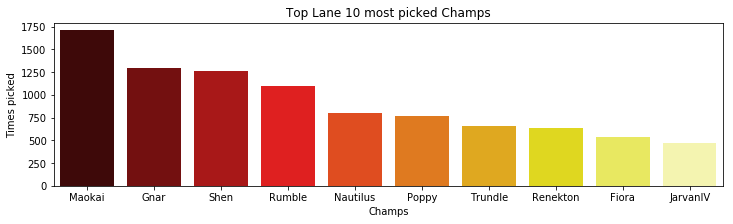

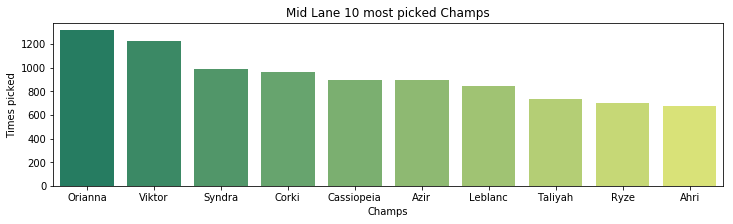

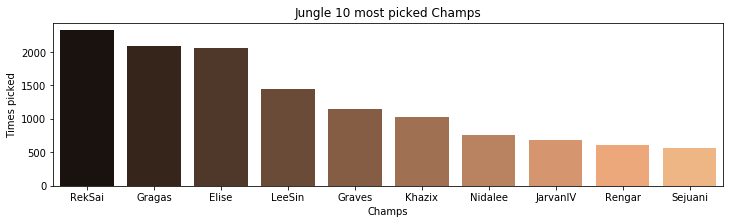

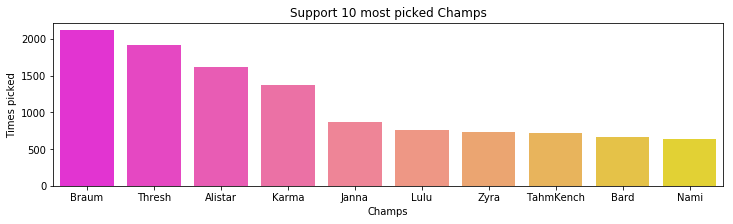

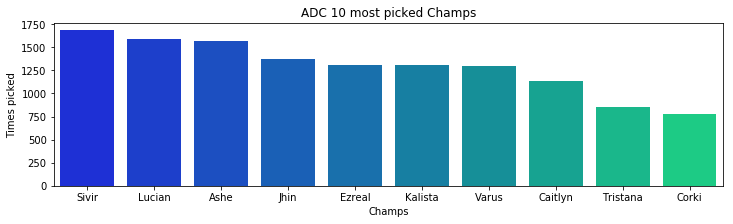

In [258]:
# Use matplotlib code to set figure size and title
plt.figure(figsize=(12,3))
plt.title("Top Lane 10 most picked Champs")
# Create chart using seaborn
sns.countplot(x = "Top",
              data = summary,
              order = summary["Top"].value_counts().iloc[:10].index,
              palette="hot")
# Rename axes
plt.xlabel("Champs")
plt.ylabel("Times picked")

# Repeat for Mid
plt.figure(figsize=(12,3))
plt.title("Mid Lane 10 most picked Champs")
sns.countplot(x = "Mid",
              data = summary,
              order = summary["Mid"].value_counts().iloc[:10].index,
              palette="summer")
plt.xlabel("Champs")
plt.ylabel("Times picked")

# Repeat for Jungle
plt.figure(figsize=(12,3))
plt.title("Jungle 10 most picked Champs")
sns.countplot(x = "Jungle",
              data = summary,
              order = summary["Jungle"].value_counts().iloc[:10].index,
              palette="copper")
plt.xlabel("Champs")
plt.ylabel("Times picked")

# Repeat for Support
plt.figure(figsize=(12,3))
plt.title("Support 10 most picked Champs")
sns.countplot(x = "Support",
              data = summary,
              order = summary["Support"].value_counts().iloc[:10].index,
              palette="spring")
plt.xlabel("Champs")
plt.ylabel("Times picked")

# Repeat for ADC
plt.figure(figsize=(12,3))
plt.title("ADC 10 most picked Champs")
sns.countplot(x = "ADC",
              data = summary,
              order = summary["ADC"].value_counts().iloc[:10].index,
              palette="winter")
plt.xlabel("Champs")
plt.ylabel("Times picked")

7a.ii - Overall most picked champions

Text(0,0.5,'Times picked')

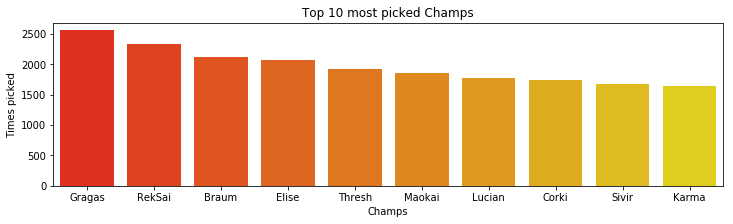

In [362]:
# amalgamate all the heroes from each lane into a single DataFrame
all_picks = pd.DataFrame(pd.concat([summary["Top"],
                                    summary["Mid"],
                                    summary["Jungle"],
                                    summary["Support"],
                                    summary["ADC"]],
                                   ignore_index=True))
# Repeat chart method from above
plt.figure(figsize=(12,3))
plt.title("Top 10 most picked Champs")
sns.countplot(x = 0 ,
              data = all_picks,
              order = all_picks[0].value_counts().iloc[:10].index,
              palette="autumn")
plt.xlabel("Champs")
plt.ylabel("Times picked")

7a.iii Further Data analysis

From the information, we can see that while Gragas is the most picked champ, it is because of his flexibility to be played in multiple roles. Only the second most-picked jungler (2094 times or 27% of all matches) - he was also picked over 400 times as the top-laner, (6% of all matches)

In [360]:
# Evaluate how often Gragas was picked in the top lane
gragas_top = summary["Top"] == "Gragas"
gragas_top.value_counts()

False    14798
True     442  
Name: Top, dtype: int64

In [361]:
# Evaluate how often Gragas was picked in the jungle
gragas_jungle = summary["Jungle"] == "Gragas"
gragas_jungle.value_counts()

False    13146
True     2094 
Name: Jungle, dtype: int64

7b - How varied is team composition?

From a total of 15,240 team compositions, the composition was amazingly unique 14,626 times.

In [263]:
# use .unique to identify unique combinations in the 'Picks' column
summary["Picks"].nunique()

14626

7c.i - Who was the most successful team across this period?

In [404]:
# Limit the teams to those with 20 competitive matches or more in the time period
# Count how many games each team has played
played_20_matches = summary["Team Name"].value_counts()
played_20_matches[played_20_matches > 20]

# create a new summary with only teams with 20+ games
teams_20_matches_summary = summary[summary["Team Name"].isin(played_20_matches[played_20_matches > 20].index)]

# group the dataset by team
team_group = teams_20_matches_summary.groupby(["Team Name"])

# take the win rate of each team, and sort it from highest to lowest
team_success = pd.DataFrame(team_group["Result"].mean().sort_values(ascending = False))

# return top 10 successful teams
top_10_win_rate = team_success.head(10)
top_10_win_rate

,Result
Team Name,
LYN,0.893333
DFM,0.797468
ahq,0.774194
ANX,0.718750
SKT,0.712159
GET,0.710526
LGC,0.687500
FW,0.676230
CHF,0.671756


In [385]:
# repeat for team with most wins in the period
# take the win rate of each team, and sort it from highest to lowest
team_success = pd.DataFrame(team_group["Result"].sum().sort_values(ascending = False))

# return top 10 successful teams
team_success.head(10)

,Result
Team Name,
SKT,287
TSM,207
kt,186
SSG,181
C9,178
FW,165
CLG,165
FNC,162
H2K,158


From the above outputs showing the teams with the highest win percentage, and the teams with the most wins, SKT and FW would appear to be the most overall successful, with high numbers of matches won with a top 10 win percentage.

In [399]:
# group the dataset by team and colour
team_group_by_colour = teams_20_matches_summary.groupby(["Team Name", "Team"])
# take the win rate of each team, and sort it from highest to lowest
team_success_by_colour = team_group_by_colour["Result"].mean()

KeyError: 'Team Name'